<a href="https://colab.research.google.com/github/WayneLin015/LAB/blob/master/softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


--------------START--------------
epoch: 0 loss：5400.156516  tacc: 10.027083 validacc: 9.900000
epoch: 1 loss：5399.941842  tacc: 10.029167 validacc: 9.900000
epoch: 2 loss：5399.731502  tacc: 10.029167 validacc: 9.900000
epoch: 3 loss：5399.522782  tacc: 10.027083 validacc: 9.900000
epoch: 4 loss：5399.313017  tacc: 10.027083 validacc: 9.900000
epoch: 5 loss：5399.099552  tacc: 10.031250 validacc: 9.916667
epoch: 6 loss：5398.880085  tacc: 10.045833 validacc: 9.950000
epoch: 7 loss：5398.652746  tacc: 10.075000 validacc: 10.016667
epoch: 8 loss：5398.416044  tacc: 10.139583 validacc: 10.158333
epoch: 9 loss：5398.168460  tacc: 10.372917 validacc: 10.816667
epoch: 10 loss：5397.908410  tacc: 11.012500 validacc: 12.283333
epoch: 11 loss：5397.634682  tacc: 12.331250 validacc: 14.416667
epoch: 12 loss：5397.345446  tacc: 14.522917 validacc: 16.808333
epoch: 13 loss：5397.038940  tacc: 17.227083 validacc: 19.441667
epoch: 14 loss：5396.712921  tacc: 19.664583 validacc: 21.475000
epoch: 15 loss：5396.365

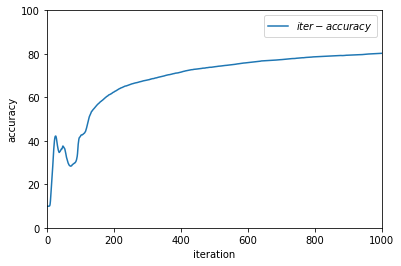

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn

# In[4]:
def InnerProduct_For(x,W,b):
        
    y = np.dot(x,W)+b
    
    return y

def InnerProduct_Back(dEdy,x,W,b):
    dEdx = np.dot(dEdy,W.T)
    dEdW = np.dot(x.T,dEdy) 
    dEdb = np.dot(np.ones([1,48000]),dEdy)
    return dEdx,dEdW,dEdb

def Softmax_For(x):
    m = x.shape[0]
    softmax = np.ones([x.shape[0],x.shape[1]])
    a = np.max(x,axis=1)
    for i in range(m):
        x[i]=x[i,:]-a[i]
        softmax[i] = np.exp(x[i,:]) / np.sum(np.exp(x[i,:]))    
    return softmax    

def Softmax_Back(y,t):
    dEdx = (y-t)
    return dEdx

def Sigmoid_For(x):
    y=1/(1+np.exp(-x))
    return y

def Sigmoid_Back(dEdy,x):  
    dEdx = dEdy*(1-Sigmoid_For(x))*Sigmoid_For(x)
    return dEdx

def ReLu_For(x):
    y=np.maximum(0,x)
    return y

def ReLu_Back(dEdy,x):
    x[x<=0]=0
    x[x>0]=1   
    dEdx = dEdy*x       
    return dEdx

def loss_For(y,y_pred):
    #loss = np.square(y_pred-y).sum()
    loss = np.sum(np.square(y-y_pred))/2
    #loss = np.sum(np.log(-y)*y_pred)
    return loss


eta =  0.000001         #learning rate
Data_num = 784      #size of input data   (inputlayer)
W1_num = 15         #size of first neural (1st hidden layer)
Out_num = 10        #size of output data  (output layer)
iteration = 1000     #epoch for training   (iteration)
image_num = 60000   #input images
test_num  = 10000   #testing images

## Cross Validation ##
##spilt the training data to 80% train and 20% valid##
train_num = int(image_num*0.8)
valid_num = int(image_num*0.2)


# ## Setup the Data (Create weight array here!!!)

# In[5]:


w_1= (np.random.normal(0,1,Data_num*W1_num)).reshape(Data_num,W1_num)/100
w_out  = (np.random.normal(0,1,W1_num*Out_num)).reshape(W1_num, Out_num)/100
b_1, b_out = randn(1,W1_num)/100,randn(1,Out_num)/100


df = pd.read_csv('/content/gdrive/My Drive/ML/LAB1/fashion-mnist_train_data.csv')
fmnist_train_images = df.values

df = pd.read_csv('/content/gdrive/My Drive/ML/LAB1/fashion-mnist_test_data.csv')
fmnist_test_images = df.values

df = pd.read_csv('/content/gdrive/My Drive/ML/LAB1/fashion-mnist_train_label.csv')
fmnist_train_label = df.values


# ### Show the 100 testing images

# In[7]:


label_temp = np.zeros((image_num,10), dtype = np.float32)

for i in range(image_num):
    label_temp[i][fmnist_train_label[i][0]] = 1
train_labels_onehot = np.copy(label_temp)

# ### Separate train_images, train_labels into training and validating 

# In[13]:
train_data_img = np.copy(fmnist_train_images[:train_num,:])
train_data_lab = np.copy(train_labels_onehot[:train_num,:])
valid_data_img = np.copy(fmnist_train_images[train_num:,:])
valid_data_lab = np.copy(train_labels_onehot[train_num:,:])

# Normalize the input data between (0,1)
train_data_img = train_data_img/255.
valid_data_img = valid_data_img/255.
test_data_img = fmnist_test_images/255.

print("--------------START--------------")
valid_accuracy=[]
train_accuracy=[]
for i in range(iteration):

    # Forward-propagation
    Inner1 = InnerProduct_For(train_data_img,w_1,b_1)
    ReLu = ReLu_For(Inner1)
    Inner2 = InnerProduct_For(ReLu,w_out,b_out)
    Softmax = Softmax_For(Inner2)
       
    # Bakcward-propagation
    Softmaxback = Softmax_Back(Softmax,train_data_lab)    
    dEdx,Grad_w_out,Grad_b_out = InnerProduct_Back(Softmaxback,ReLu,w_out,b_out)
    ReLuback = ReLu_Back(dEdx,ReLu)
    dEda,Grad_w_1,Grad_b_1 = InnerProduct_Back(ReLuback,train_data_img,w_1,b_1)
    
    # Parameters Updating (Gradient descent)
    w_1 = w_1 - eta*Grad_w_1
    b_1 = b_1 - eta*Grad_b_1
    w_out = w_out - eta*Grad_w_out
    b_out = b_out - eta*Grad_b_out    
    # Do cross-validation to evaluate model
    
    validInner1 = InnerProduct_For(valid_data_img,w_1,b_1)
    validReLu = ReLu_For(validInner1)
    validInner2 = InnerProduct_For(validReLu,w_out,b_out)
    validSoftmax = Softmax_For(validInner2)
    
    # Get 1-D Prediction array
   
    # Compare the Prediction and validation
    loss = loss_For(valid_data_lab,validSoftmax)


    vpred_index = np.argmax(validSoftmax, axis=1)
    vacc = (vpred_index == np.argmax(valid_data_lab, axis=1)).sum()   
    valid_accuracy.append(vacc/120)

    tpred_index = np.argmax(Softmax,axis=1)
    tacc = (tpred_index == np.argmax(train_data_lab,axis=1)).sum()
    train_accuracy.append(tacc/480)
    
    print('epoch: %d loss：%f  tacc: %f validacc: %f' %(i,loss,tacc/480,vacc/120))

testInner1 = InnerProduct_For(test_data_img,w_1,b_1)
testRelu = ReLu_For(testInner1)
testInner2 = InnerProduct_For(testRelu,w_out,b_out)
test_Out_data = Softmax_For(testInner2)

test_Prediction  = np.argmax(test_Out_data, axis=1)[:,np.newaxis].reshape(test_num,1)
df = pd.DataFrame(test_Prediction,columns=["Prediction"])
df.to_csv("Softmax_prediction_ID.csv",index=True, index_label="index")


accuracy = np.array(valid_accuracy)
plt.plot(accuracy, label="$iter-accuracy$")
y_ticks = np.linspace(0, 100, 11)
plt.legend(loc='best')
plt.xlabel('iteration')
plt.axis([0, iteration, 0, 100])
plt.ylabel('accuracy')
plt.show()